# Regresión Lineal

En este ejemplo cargaremos un dataset obtenido mediante webscraping y que contiene diversas URLs de articulos sobre Machine Learning.
Este archivo contiene mitad de datos reales y mitad de datos generados aleatoriamente por lo que los datos que obtendremos no serán reales.

Este archivo de datos estará compuesto por las siguientes columans:
Title: titulo del artículo
* url: ruta al artículo
* Wordcount: la cantidad de palabras del artículo,
* of Links: los enlaces externos que contiene,
* of comments: cantidad de comentarios,
* Images video: suma de imágenes (o videos),
* Elapsed days: la cantidad de días transcurridos (al momento de crear el archivo)
* Shares:nuestra columnadesalida queserá la “cantidad de veces que se compartió el artículo”

Importamos las librerrías necesarias

In [2]:
#librerias necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import _cm
plt.rcParams["figure.figsize"] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data=pd.read_csv("data/articulos_ml.csv")
data.shape

(161, 8)

Vamos a mostrar los primeros registros de nuestro dataset

In [4]:
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


A primera vista observamos una serie de valores nulos tanto en url como en comentarios. Vamos a obtener algunas de las estadísticas básicas de nuestros datos:

In [5]:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


Vemos como el número medio de palabras por artículo es de 1808, siendo la longitud del más corto de 250 palabras y el más largo de 8401. Vamos a intentar ver a través de nuestra relación lineal si existe una correlación entre el número de palabras y el número de veces que ha sido compartido.

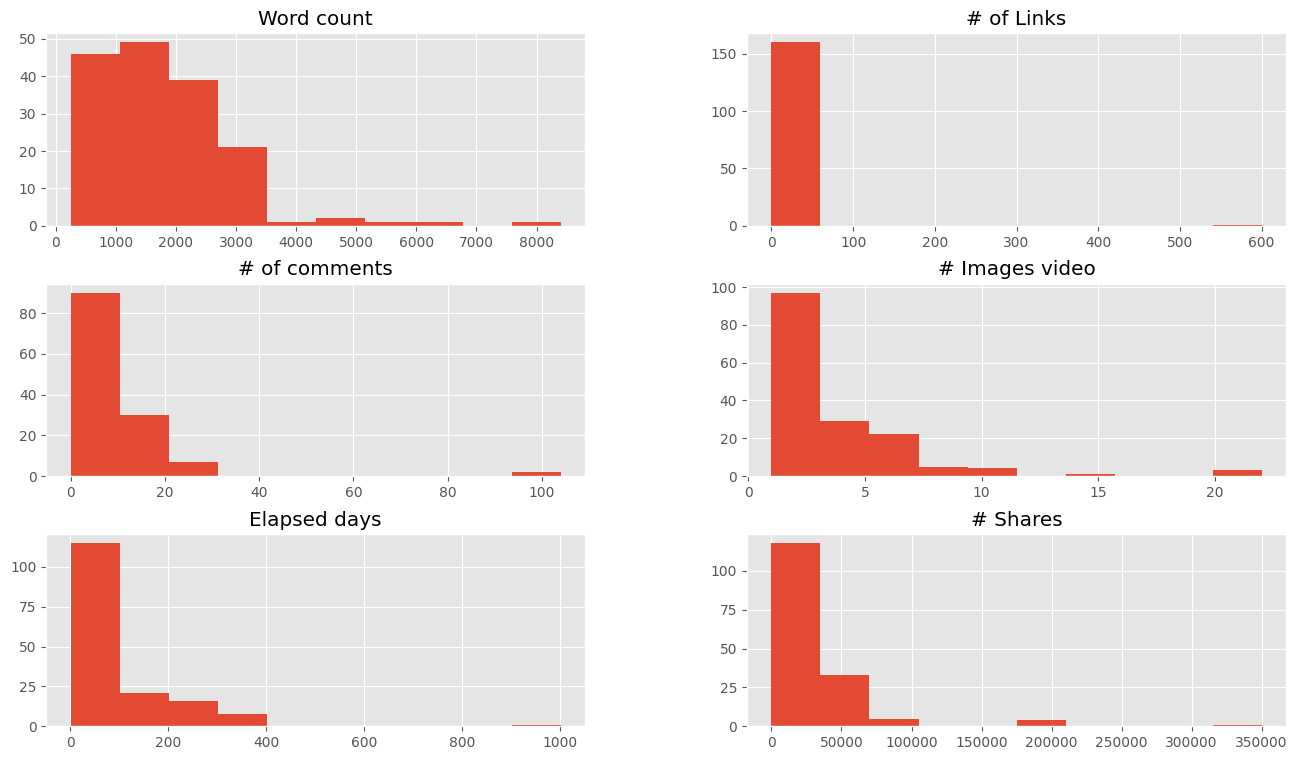

In [6]:
#Visualización rápida de los datos.
data.drop(["Title","url"],axis=1).hist()
plt.show()

Vamos a filtrar los datos en los valores que se concentran la mayoría de los registros. En el caso de las palabras que sean menor que 3.500 y en los compartidos menores a 80.000. Posteriormente diferenciaremos los puntos que se encuentran por encima y por debajo de la media de palabras (1808), en color naranja y azul respectivamente.

In [7]:
filtered_data=data[(data["Word count"]<=3500)&(data["# Shares"]<=80000)]
colour=["orange","blue"]
size=[30,60]

f1=filtered_data["Word count"].values
f2=filtered_data["# Shares"].values

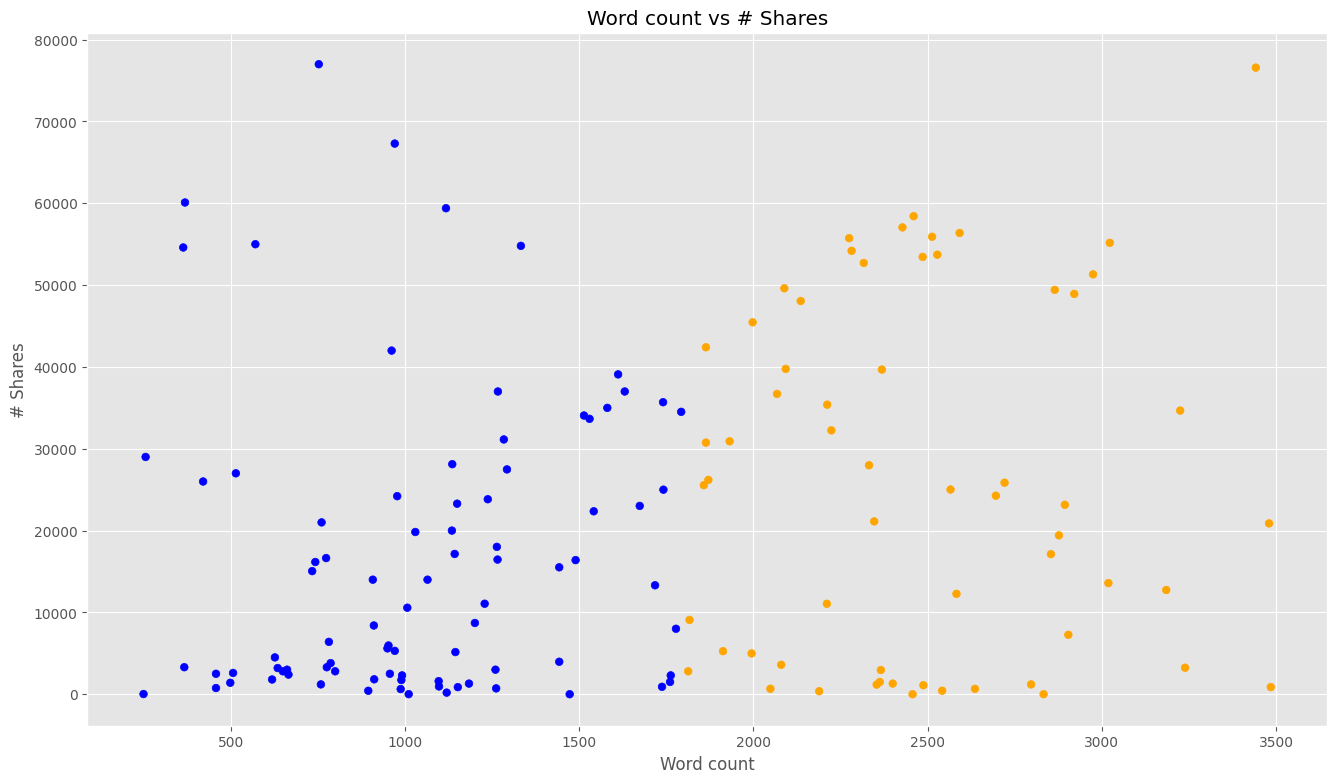

In [17]:
asignar=[]
for index, row in filtered_data.iterrows():
    if(row["Word count"]>1808):
        asignar.append(colour[0])
    else:
        asignar.append(colour[1])

plt.scatter(f1,f2,c=asignar,s=size[0])
plt.title("Word count vs # Shares")
plt.xlabel("Word count")
plt.ylabel("# Shares")
plt.show()


# Regresión lineal.
Comenzamos nuestro modelo de regresión lineal con las variables de entrada "Word count" y "# Shares".

In [13]:
# Asignamos la variable de entrada X para el netrenamiento y las etiquetas Y
dataX=filtered_data[["Word count"]]
X_train=np.array(dataX)
y_train=filtered_data["# Shares"].values

# Creamos el modelo de regresión lineal
regr=linear_model.LinearRegression()

# Entrenamos el modelo
regr.fit(X_train,y_train)
# Predicciones
y_pred=regr.predict(X_train)

# Obtenemos los coeficientes.
print("Coeficientes: \n", regr.coef_)
# Valor donde se intercepta el eje Y
print("Término independiente: \n", regr.intercept_)
# Error cuadrático medio
print("Error cuadrático medio: \n %.2f" % mean_squared_error(y_train, y_pred))
# Varianza explicada
print("Varianza explicada: \n %.2f" % r2_score(y_train, y_pred))

Coeficientes: 
 [5.69765366]
Término independiente: 
 11200.30322307416
Error cuadrático medio: 
 372888728.34
Varianza explicada: 
 0.06


En la ecuación de la recta y =  mX +  b, nuestra pendiente m tiene un valor de 5.69765366 y el término independiente es  11200.30322307416. El Error Cuadrático Medio es enorme y la varianza está lejos de 1 por lo que este modelo no será nada bueno prediciendo.

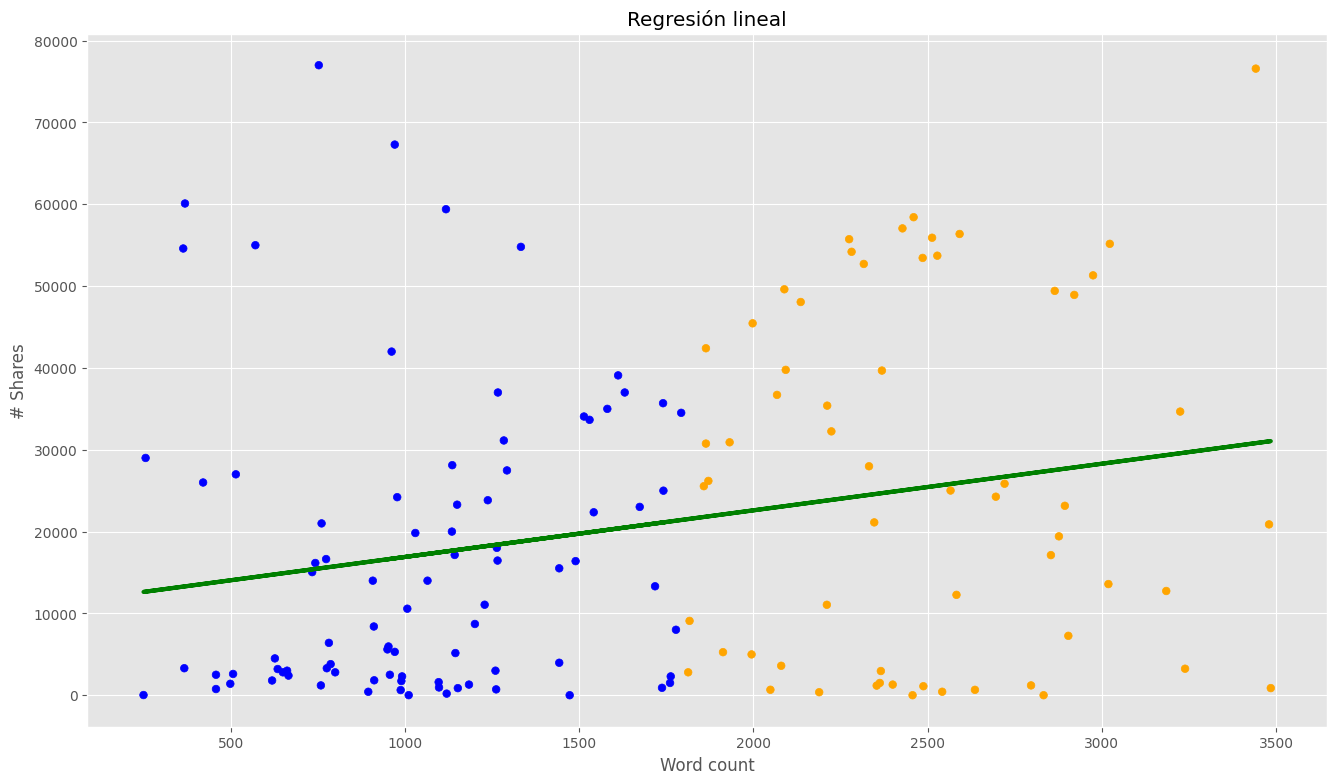

In [ ]:
# Visualizamos los resultados sobre nuestros datos
plt.scatter(f1,f2,c=asignar,s=size[0])
plt.plot(X_train,y_pred, color="green", linewidth=3)
plt.xlabel("Word count")
plt.ylabel("# Shares")
plt.title("Regresión lineal")
plt.show()

A continuación vamos a probar nuestro modelo, suponiendo que queremos predecir el número de veces que se compartirá un artículo sobre Ml de 2.500 palabras.

In [25]:
y_Dosmilqui=regr.predict([[2500]])[0]
print("Predicción de shares para 2500 palabras: ", int(y_Dosmilqui))

Predicción de shares para 2500 palabras:  25444
